In [47]:
from mygrad import *
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from IPython.display import clear_output

### Creamos el dataset

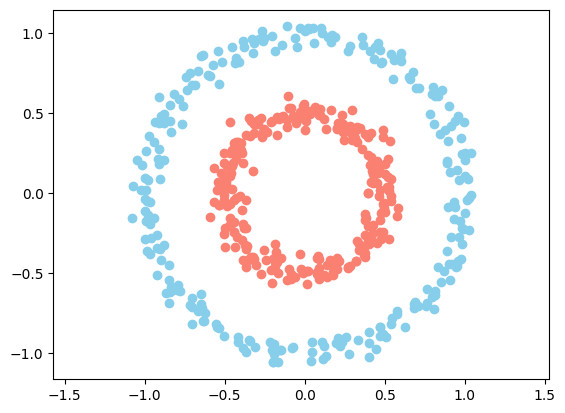

In [2]:
n = 500
p = 2

X, Y = make_circles(n_samples=n,factor=0.5,noise = 0.05)

Y = Y[:,np.newaxis]

plt.scatter(X[Y[:,0] == 0, 0],X[Y[:,0] == 0, 1],c='skyblue')
plt.scatter(X[Y[:,0] == 1, 0],X[Y[:,0] == 1, 1],c='salmon')
plt.axis('equal')
plt.show()

In [49]:
model = MLP(2, [4,8,1], 'tanh')
lX = X.tolist()
lY = Y.tolist()


res = 50

_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

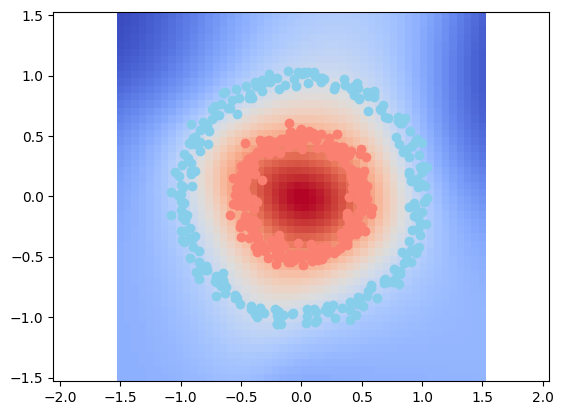

n = 26: err = 0.013907873808236142


In [60]:
for n in range(30):
    
    errs = Value(0)
    for i in range(len(lX)):
        errs += (model(lX[i]) - lY[i][0])**2
    err = errs / len(lX)
    
    err.backward()
    
    for p in model.parameters():
        p.data -= 0.2 * p.grad
    model.zero_grad()
    
    if n%5==0:
        y = np.array([model([x0, x1]).data for x0 in _x0 for x1 in _x1]).reshape(res,res)
        plt.pcolormesh(_x0, _x1, y, cmap = 'coolwarm')
        plt.axis('equal')
        plt.scatter(X[Y[:,0] == 0, 0],X[Y[:,0] == 0, 1],c='skyblue')
        plt.scatter(X[Y[:,0] == 1, 0],X[Y[:,0] == 1, 1],c='salmon')
        plt.show()
        print(f'n = {n+1}: err = {err.data}')
        clear_output(wait = True)
        

Value(data=0.0022, grad=0.0000)